In [15]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

In [11]:
h = .02  # step size in the mesh
alphas = [8, 2, 0.]

classifiers = []
for i in alphas:
    classifiers.append(make_pipeline(
                       StandardScaler(),
                       MLPClassifier(solver='lbfgs', alpha=i,
                                     random_state=1, max_iter=2000,
                                     early_stopping=True,
                                     hidden_layer_sizes=[100, 100, 100])
                       ))

i = 1
X, y = make_moons(noise=0.3, random_state=0, n_samples=500)

# preprocess dataset, split into training and test part
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# train classifiers
for j, clf in enumerate(classifiers):
    clf.fit(X_train, y_train)
    

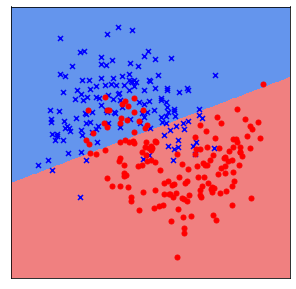

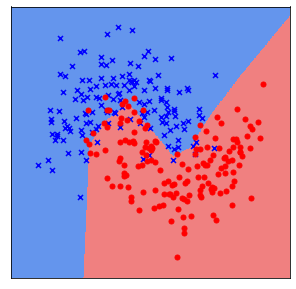

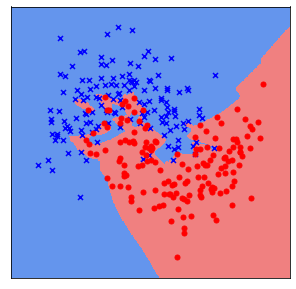

In [14]:
cm = ListedColormap(['#6495ED', '#F08080'])
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

names = ['underfitting', 'normal', 'overfitting']

# plot graphs
for i, clf in enumerate(classifiers):
    
    fig, ax = plt.subplots(figsize=(5, 5))
    
    # Plot the decision boundary. For that, we will assign a color to each
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=1)

    # Plot testing points
    # ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, alpha=0.6, edgecolors='black', s=25)

    ax.scatter(
        X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], 
        alpha=1, color="blue", marker="x", s=25)
    ax.scatter(
        X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], 
        alpha=1, color="red", marker="o", s=25)
    

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

    plt.savefig('main/ch2-background/{}.pdf'.format(names[i]), format='pdf', dpi=300)